# insert titel of code

generic intro text

## imports

### Libraries

In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
import argparse

### Custom scripts

In [2]:
# from scripts.args import *
from scripts.base_model.preprocessing import *
from scripts.base_model.train_base import *
from scripts.base_model.models import *
from scripts.evaluation.eval_model import *
from scripts.evaluation.get_results import *
from scripts.CEF_model.CEF_model import *
from scripts.CEF_model.train_CEF import *


## Args

### args preprocessing

sentires_dir    =       location of the preprocessed data. \
review_dir      =       location of the json dataset \
user_thresh     =       how many reviews a user needs to have \
item_thresh     =       how many reviews an item has to have \
sample_ratio    =       \
test_length     =       how many items in the test set. \
neg_length      =       amount of negative items. \
save_path       =       where the dataset object will be saved. \
user_pre        =       wether or not to use a pre created dataset. If this value is true it will use                     the data stroted in save_path.

In [3]:
def arg_parser_preprocessing():
    parser = argparse.ArgumentParser()
    parser.add_argument("--sentires_dir", dest="sentires_dir", type=str, default="data/input_data/reviews_with_features.txt", 
                        help="path to sentires data")
    parser.add_argument("--review_dir", dest="review_dir", type=str, default="data/input_data/reviews_Electronics_5_filtered.json", 
                        help="path to original review data")
    parser.add_argument("--user_thresh", dest="user_thresh", type=int, default=20, 
                        help="remove users with reviews less than this threshold")
    parser.add_argument("--item_thresh", dest="item_thresh", type=int, default=15, 
                        help="remove users with reviews less than this threshold")
    parser.add_argument("--sample_ratio", dest="sample_ratio", type=int, default=2, 
                        help="the (negative: positive sample) ratio for training BPR loss")
    parser.add_argument("--test_length", dest="test_length", type=int, default=5, 
                        help="the number of test items")
    parser.add_argument("--neg_length", dest="neg_length", type=int, default=100, help="# of negative samples in evaluation")
    parser.add_argument("--save_path", dest="save_path", type=str, default="data/preprocessed_data/Dataset.pickle", 
                        help="The path to save the preprocessed dataset object")
    parser.add_argument("--use_pre", dest="use_pre", type=str, default=True, 
            help="Wether or not to use a stored dataset object")
    parser.add_argument("--extra_filter", dest="extra_filter", type=bool, default=True)
    return parser.parse_known_args()

### args Train base model

device = either cpu or cuda depending on wether you use a gpu \
batch_size = the batch size \
lr = learning rate \
rec_k = length of the recommendation list \
weight_decay = 

In [4]:
def arg_parser_training():
    parser = argparse.ArgumentParser()
    parser.add_argument("--device", dest = "device", type=str, default='cpu')
    parser.add_argument("--gpu", default=False)
    parser.add_argument("--batch_size", dest="batch_size", type=int, default=128)
    parser.add_argument("--lr", dest="lr", type=float, default=0.01)
    parser.add_argument("--rec_k", dest="rec_k", type=int, default=5, help="length of rec list")
    parser.add_argument("--weight_decay", default=0., type=float) # not sure whether to use
    parser.add_argument("--model_path", dest="model_path", type=str, default="data/models/model.model", 
                        help="The path to save the model")
    parser.add_argument("--epochs", dest="epochs", type=int, default=50)
    parser.add_argument("--use_pre", dest="use_pre", type=str, default=False, 
            help="Wether or not to use a stored model object")
    return parser.parse_known_args()

### arg CEF

In [5]:
# todo
def arg_parser_CEF():
    parser = argparse.ArgumentParser()
    parser.add_argument("--device", dest = "device", type=str, default='cpu')
    parser.add_argument("--rec_k", dest="rec_k", type=int, default=5, help="length of rec list")
    parser.add_argument("--ld", default=1, type=float) # not sure whether to use
    parser.add_argument("--lr", dest="lr", type=float, default=0.01)
    parser.add_argument("--model_path", dest="model_path", type=str, default="data/models/CEF_model.model", 
                        help="The path to save the model")
    parser.add_argument("--epochs", dest="epochs", type=int, default=300)
    parser.add_argument("--use_pre", dest="use_pre", type=str, default=True, 
            help="Wether or not to use a stored model object")
    return parser.parse_known_args()

### args get results

In [6]:
def arg_parser_results():
    parser = argparse.ArgumentParser()
    parser.add_argument("--device", dest = "device", type=str, default='cpu')
    parser.add_argument("--remove_size", dest="remove_size", type=int, default=50)
    parser.add_argument("--rec_k", dest="rec_k", type=int, default=5, help="length of rec list")
    parser.add_argument("--output_path", dest="output_path", type=str, default="results/result dicts/", 
                        help="The path to save the model")
    parser.add_argument("--epochs", dest="epochs", type=int, default=1000)
    parser.add_argument("--beta", dest="beta", type=int, default=0.1 )
    return parser.parse_known_args()

## Basemodel

In [7]:
device = "cpu"

### Preprocessing

In [8]:
# get the arguments for preprocessing
preprocessing_args, unkown = arg_parser_preprocessing()
# load dataset if the dataset exist
dataset_path = preprocessing_args.save_path
if preprocessing_args.use_pre:
    with open(dataset_path, "rb") as f:
        dataset = pickle.load(f)
else:
    dataset = preprocessing(preprocessing_args)
    with open(dataset_path, "wb") as f:
            pickle.dump(dataset, f)

### Train base model

In [9]:
train_args, _ = arg_parser_training()
model_path = train_args.model_path
if train_args.use_pre:
    base_model = BaseRecModel(dataset.feature_num, dataset).to(device)
    base_model.load_state_dict(torch.load(model_path))
else:
    base_model = trainmodel(train_args, dataset)

  0%|          | 0/50 [00:00<?, ?it/s]

epoch 0:  training loss:  0.5455269


  2%|▏         | 1/50 [01:30<1:14:06, 90.74s/it]

epoch 0:  training loss:  0.5455269 NDCG:  0.2589241853309336


  4%|▍         | 2/50 [02:17<52:04, 65.09s/it]  

epoch 1:  training loss:  0.49150938
epoch 2:  training loss:  0.47571614


  6%|▌         | 3/50 [03:51<1:01:05, 78.00s/it]

epoch 2:  training loss:  0.47571614 NDCG:  0.25453193657220136


  8%|▊         | 4/50 [04:37<50:09, 65.43s/it]  

epoch 3:  training loss:  0.4670207
epoch 4:  training loss:  0.46107754


 10%|█         | 5/50 [06:18<58:42, 78.27s/it]

epoch 4:  training loss:  0.46107754 NDCG:  0.2664019015901705


 12%|█▏        | 6/50 [07:04<49:25, 67.40s/it]

epoch 5:  training loss:  0.45638648
epoch 6:  training loss:  0.4521667


 14%|█▍        | 7/50 [08:35<53:51, 75.16s/it]

epoch 6:  training loss:  0.4521667 NDCG:  0.2550927231599388


 16%|█▌        | 8/50 [09:24<46:37, 66.62s/it]

epoch 7:  training loss:  0.44873512
epoch 8:  training loss:  0.44531545


 18%|█▊        | 9/50 [11:13<54:44, 80.11s/it]

epoch 8:  training loss:  0.44531545 NDCG:  0.25550752118117837


 20%|██        | 10/50 [12:01<46:47, 70.19s/it]

epoch 9:  training loss:  0.4424081
epoch 10:  training loss:  0.4395792


 22%|██▏       | 11/50 [13:31<49:30, 76.17s/it]

epoch 10:  training loss:  0.4395792 NDCG:  0.2587370212323632


 24%|██▍       | 12/50 [14:10<41:07, 64.93s/it]

epoch 11:  training loss:  0.43682048


 24%|██▍       | 12/50 [14:20<45:25, 71.71s/it]


KeyboardInterrupt: 

### Results of base model

In [10]:
ndcg, f1, _ = eval_model(dataset, 5, base_model, device)
print(f"ndcg : {ndcg}")
print(f"f1 : {f1}")

ndcg : 0.07940006393957424
f1 : 0.07656850192061461


### CEF model

In [11]:
### stil to do.
CEF_args, _ = arg_parser_CEF()
model_path = CEF_args.model_path
CEF_model = CEF(CEF_args, dataset, base_model).to(device)
if CEF_args.use_pre:
    CEF_model.load_state_dict(torch.load(model_path))
else:
    CEF_model = train_delta(CEF_args, CEF_model)

### Obtain a list of feature IDs, ranked by explainability score according to the trained CEF model (to clean)

In [12]:
# ranked_ids = CEF_model.top_k()

In [13]:
usepre = True
if usepre:
    with open("results/ranked_ids.pickle", "rb") as f:
        ranked_ids = pickle.load(f)
else:
    with open("results/ranked_ids.pickle", "wb") as f:
        ranked_ids = CEF_model.top_k()
        pickle.dump(ranked_ids, f)

### Plot results

In [22]:
result_args, _ = arg_parser_results()
results = get_results(dataset, result_args, base_model, CEF_model, CEF_delete_list=ranked_ids.reverse())

0.0
0.1
0.2
0.3
0.4
0.5


/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022

0.6


/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022

0.7


/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022

0.8


/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022

0.9


/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jonase/opt/miniconda3/envs/dl2022/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonase/opt/miniconda3/envs/dl2022

In [20]:
def plot_results(results):
    for method in results:
        result = results[method]
        plt.plot(result["lt"], result["ndcg"], label = method)
    
    plt.xlabel("long tail rate")
    plt.ylabel("NDCG")
    plt.legend()
    plt.show()

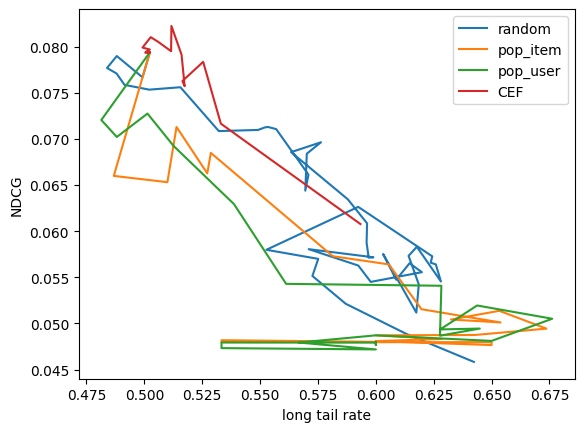

In [23]:
plot_results(results)